# Waze Regression Analysis

**=================================================================================================================**

## Project Description

Your team is more than halfway through their user churn project. Earlier, you completed a project proposal, used Python to explore and analyze Waze’s user data, created data visualizations, and conducted a hypothesis test. Now, leadership wants your team to build a regression model to predict user churn based on a variety of variables.

You check your inbox and discover a new email from Ursula Sayo, Waze's Operations Manager. Ursula asks your team about the details of the regression model. You also notice two follow-up emails from your supervisor, May Santner. The first email is a response to Ursula, and says that the team will build a binomial logistic regression model. In her second email, May asks you to help build the model and prepare an executive summary to share your results.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|label |Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month 	|
|sessions |	The number of occurrence of a user opening the app during the month |
|drives |	An occurrence of driving at least 1 km during the month |
|device |	The type of device a user starts a session with |
|total_sessions |A model estimate of the total number of sessions since a user has onboarded	|
|n_days_after_onboarding |The number of days since a user signed up for the app	|
|total_navigations_fav1 |Total navigations since onboarding to the user’s favorite place 1	|
|total_navigations_fav2 |Total navigations since onboarding to the user’s favorite place 2	|
|driven_km_drives |	Total kilometers driven during the month |
|duration_minutes_drives |	Total duration driven in minutes during the month |
|activity_days |Number of days the user opens the app during the month	|
|driving_days |Number of days the user drives (at least 1 km) during the month	|

## Business Task

In this activity, you will build a binomial logistic regression model. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.
<br/>

**The purpose** of this project is to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.
<br/>

*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a binomial logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

<br/>


## Data Tasks

- Load Selected Data
- Perform GridSearchCV or RandomSearch CV
- Apply best hyperparameters into model
- Evaluate the model
- Perform Cross Validation
- Record results

## Recommendation for Action

**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date

# import shap
# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import f_regression, f_classif, chi2, RFE, RFECV
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB

from sklearn.inspection import permutation_importance

import imblearn

from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek


import feature_engine

from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures 
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection
from feature_engine.selection import SelectBySingleFeaturePerformance, RecursiveFeatureElimination



%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# This module lets us save our models once we fit them.
# import pickle

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Quick Data Glance

In [ ]:
#df = pd.read_csv("wazesmotetlink.csv")

In [2]:
df = pd.read_csv("wazesmotetlink2.csv")

In [3]:
df.head()

,ndaysafteronboarding,activitydays,android,label
0,2651,14,1,0
1,15,7,0,0
2,1562,27,1,0
3,2637,15,0,0
4,2999,22,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17496 entries, 0 to 17495
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   ndaysafteronboarding  17496 non-null  int64
 1   activitydays          17496 non-null  int64
 2   android               17496 non-null  int64
 3   label                 17496 non-null  int64
dtypes: int64(4)
memory usage: 546.9 KB


In [5]:
df.dtypes.value_counts()

int64    4
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,ndaysafteronboarding,activitydays,android,label
count,17496.00,17496.00,17496.00,17496.00
mean,1643.65,14.42,0.26,0.50
std,999.38,8.42,0.44,0.50
min,6.00,0.00,0.00,0.00
25%,775.75,8.00,0.00,0.00
50%,1559.00,14.00,0.00,0.50
75%,2489.00,21.00,1.00,1.00
max,3498.00,31.00,1.00,1.00


In [7]:
# Descriptive Statistical Analysis
# df.describe(include=["int", "float"])

In [8]:
# Descriptive Statistical Analysis
# df.describe(include="object")

In [9]:
df.label.value_counts(normalize=True)

0   0.50
1   0.50
Name: label, dtype: float64

In [10]:
df.shape

(17496, 4)

In [11]:
df.columns

Index(['ndaysafteronboarding', 'activitydays', 'android', 'label'], dtype='object')

## Data Visualization

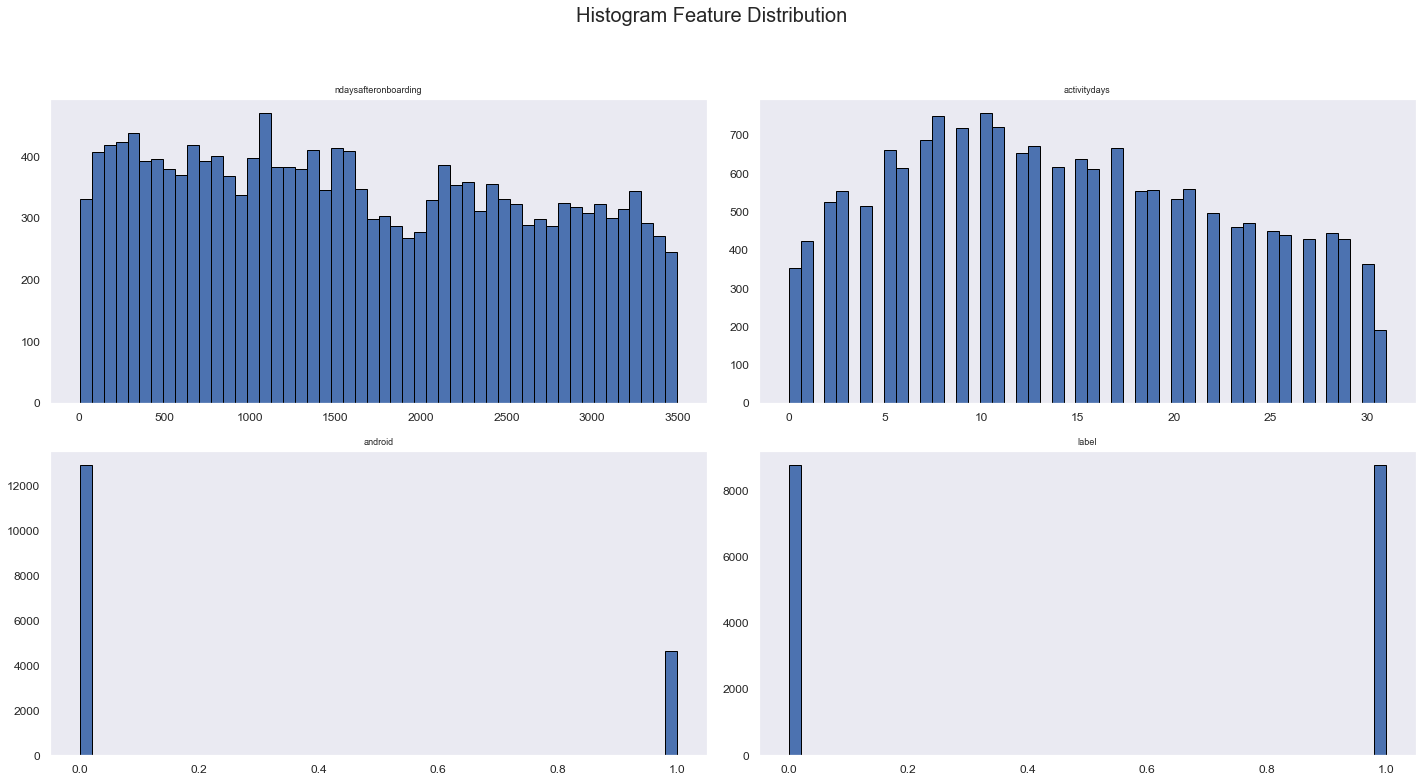

In [14]:
df.hist(bins=50, figsize=(20,20), grid=False, layout=(len(df.columns),2), edgecolor = 'black')
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

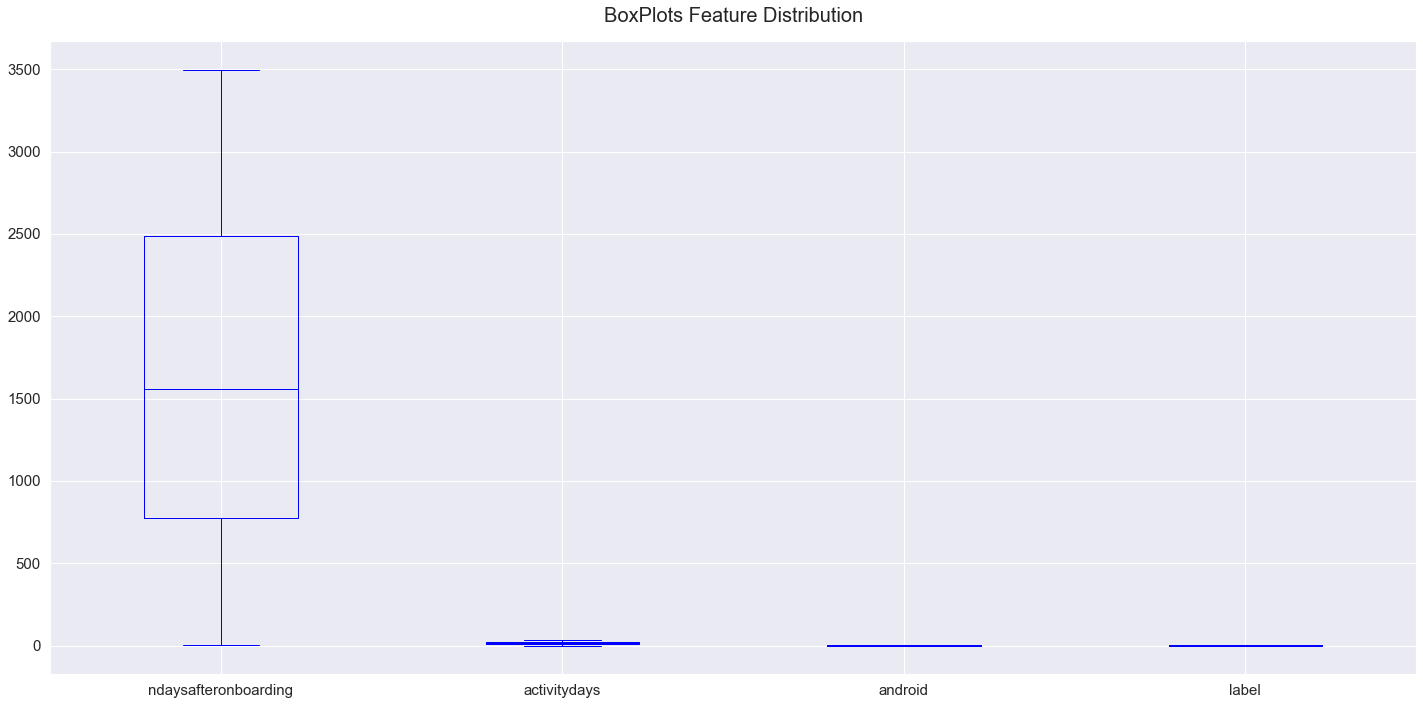

In [15]:
df.boxplot(figsize=(20,10), color="blue", fontsize = 15)
plt.title('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

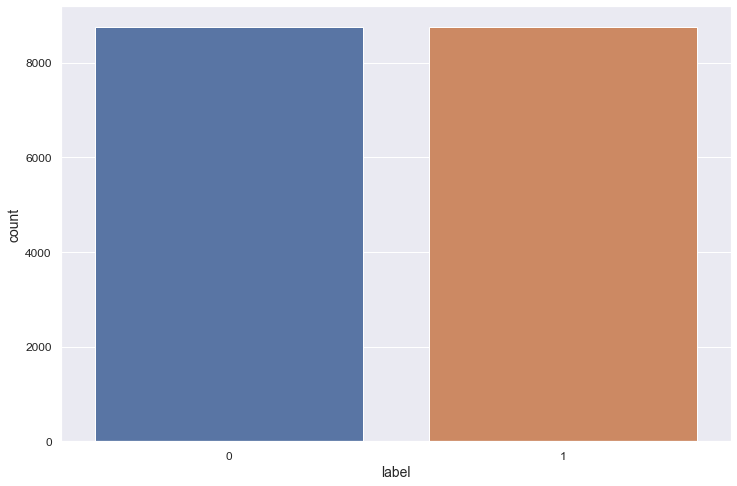

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x=df.label, data=df)
plt.show()

In [17]:
df.corr()

,ndaysafteronboarding,activitydays,android,label
ndaysafteronboarding,1.00,0.00,0.03,-0.16
activitydays,0.00,1.00,0.10,-0.38
android,0.03,0.10,1.00,-0.22
label,-0.16,-0.38,-0.22,1.00


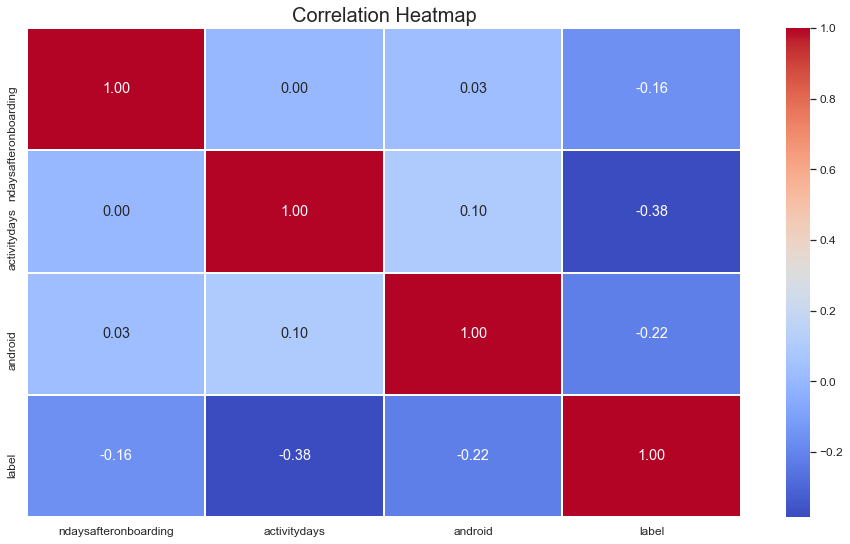

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

**==================================================================================================================**

## Create a small dataset

In [19]:
df = df.sample(frac=0.50)

In [20]:
df.reset_index(drop=True, inplace=True)

In [21]:
df.head()

,ndaysafteronboarding,activitydays,android,label
0,1576,7,0,1
1,1015,19,1,1
2,1222,7,1,0
3,1789,5,0,1
4,867,15,1,1


In [22]:
df.shape

(8748, 4)

In [23]:
df.label.value_counts(normalize=True)

1   0.51
0   0.49
Name: label, dtype: float64

**==================================================================================================================**

## Train Test Split

We've prepared our data and we're ready to model. There's one last step before we can begin. We must split the data into features and target variable, and into training data and test data. We do this using the `train_test_split()` function. We'll put 25% of the data into our test set, and use the remaining 75% to train the model.

Notice below that we include the argument `stratify=y`. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the `y` variable (our target).

The less data you have overall, and the greater your class imbalance, the more important it is to stratify when you split the data. If we didn’t stratify, then the function would split the data randomly, and we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model. Worst of all, we might not even realize what went wrong without doing some detective work.

Lastly, we set a random seed so we and others can reproduce our work.

<img src="trin-test.png">

In [24]:
df.shape

(8748, 4)

In [25]:
X = df.iloc[:,0:3]
y = df.iloc[:,3]

In [26]:
Counter(y)

Counter({1: 4433, 0: 4315})

In [27]:
X.values, y.values

(array([[1576,    7,    0],
        [1015,   19,    1],
        [1222,    7,    1],
        ...,
        [ 637,    4,    0],
        [1632,   24,    0],
        [1864,   29,    0]], dtype=int64),
 array([1, 1, 0, ..., 1, 1, 0], dtype=int64))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6998, 3), (1750, 3), (6998,), (1750,))

In [30]:
Counter(y_train), Counter(y_test)

(Counter({1: 3546, 0: 3452}), Counter({1: 887, 0: 863}))

**==================================================================================================================**

## Create a random dataset for Hyperparameter Tuning

In [31]:
df_random = df.sample(n=1800)

In [32]:
df_random.head()

,ndaysafteronboarding,activitydays,android,label
5128,866,30,0,0
3157,1744,22,0,0
3776,2937,9,1,0
6791,1889,5,0,1
5109,757,4,0,1


In [33]:
df_random.shape

(1800, 4)

In [34]:
X_random = df_random.iloc[:,:3]
y_random = df_random.iloc[:,3]

In [35]:
X_random.values, y_random.values

(array([[ 866,   30,    0],
        [1744,   22,    0],
        [2937,    9,    1],
        ...,
        [1311,    5,    1],
        [3337,   11,    0],
        [2146,    6,    0]], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64))

In [36]:
X_random_train, X_random_test, y_random_train, y_random_test = train_test_split(X_random, y_random, test_size=0.2, random_state=0, stratify=y_random)

In [37]:
X_random_train.shape, X_random_test.shape, y_random_train.shape, y_random_test.shape

((1440, 3), (360, 3), (1440,), (360,))

**=================================================================================================================**

# Class Imbalance Treatment

For many machine learning tasks on imbalanced datasets, like this credit card fraud detection, we normally care more about recall than precision. As a baseline, we want the model to be able to find all frauds and we would allow the model to make false-positive errors because the cost of false positives is usually not very high (maybe just costs a false notification email or phone call to confirm with customers). On the other hand, failing to recognize positive examples (such as fraud or a deadly disease) can be life-threatening 

As such, our priority is to improve the model's recall, then we will also want to keep precision as high as possible.

## Class reweighting

For binary classification models, its loss function is normally calculated via a sum of the loss with respect to class 0 and the loss with respect to class 1. By default, their class weights are all 1s meaning we treat each class equally important.

However, since the class distribution is skewed in imbalanced datasets and the loss function optimization process will be dominated by the majority class, we want to help the minority class by increasing its class weight in the loss function.

Class weights can be generally calculated via the following three strategies:

- Based on their instances portion in the dataset. For example, if positive instances only take 10% of the dataset, we assign its weight to be 0.9 and weight for the majority class to be 0.1
- Heuristics or domain knowledge. Misclassification normally has different costs per class, for example, the cost of failure to diagnose a disease is much higher than a false positive diagnose. If we already know such misclassification costs beforehand, we may use them to assign class weights
- Hyper-parameter tuning. Standard hyper-parameter tuning methods can be used to find optimized class weights. For example, grid searching from 0.1 to 0.9 for positive class weight to find out which hyperparameter combination generates the best model.


In [ ]:
class_weight = {}

# Assign weight of class 0 to be 0.1
class_weight[0] = 0.1

# Assign weight of class 1 to be 0.9
class_weight[1] = 0.9

In [ ]:
# Define a logistic regression with weight
logregw = LogisticRegression(random_state=0, 
                              max_iter = 1000,
                              class_weight=class_weight,
                              C=1.0)

In [ ]:
# Train the model
logregw.fit(X_train, y_train)

In [ ]:
# Make predictions on the test dataset
logregw_pred = logregw.predict(X_test)

In [ ]:
logregw_pred

In [ ]:
print("Accuracy:", "%.3f" % accuracy_score(y_test, logregw_pred))
print("Precision:", "%.3f" % precision_score(y_test, logregw_pred))
print("Recall:", "%.3f" % recall_score(y_test, logregw_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, logregw_pred))
print("ROC-AUC Score:", "%.3f" % roc_auc_score(y_test, logregw_pred))

## Undersampling/Oversampling

Different techniques used:

- Random Undersampling: RandomUnderSampler(sampling_strategy='auto', random_state=None, replacement=False)

- Condensed Nearest Neighbours (CNN): CondensedNearestNeighbour(sampling_strategy='auto', random_state=None, n_neighbors=None, n_seeds_S=1, n_jobs=None)

- Tomek Links
- One Sided Selection
- Edited Nearest Neighbours
- Repeated Edited Nearest Neighbours
- All KNN
- Neighbourhood Cleaning Rule
- NearMiss
- Instance Hardness Threshold




## SMOTE + ENN and SMOTE + Tomek Links

Combined used of SMOTE and ENN or Tomek Links to amplify the minority class and remove noisy observations that might be created.

```
# Define oversampling strategy.

SMOTE = SMOTE()

# Fit and apply the transform.

X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
X_train_SMOTE = pd.DataFrame(X_train_SMOTE,
                             columns = X_train.columns)

print('After oversampling: ', Counter(y_train_SMOTE))
```

In [ ]:
#Oversampling the minority

sm = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5, n_jobs=2)

In [ ]:
X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
# size of original data

X.shape, y.shape

In [ ]:
# size of oversampled data

X_sm.shape, y_sm.shape

In [ ]:
# number of minority class observations

y.value_counts(), y_sm.value_counts()

In [ ]:
# Undersampling the majority

In [ ]:
# need ENN  as argument of SMOTEENN
enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all',
    n_jobs=4)

In [ ]:
smenn = SMOTEENN(sampling_strategy='auto', random_state=0,  smote=sm,
        enn=enn, n_jobs=2)

In [ ]:
X_smenn, y_smenn = smenn.fit_resample(X, y)

In [ ]:
# size of oversampled datasets

X_smenn.shape, y_smenn.shape

In [ ]:
X_smenn

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="videoviewcount", y="videolikecount", data=df)
plt.title("Original Dataset")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="videoviewcount", y="videolikecount", hue=y_smenn, data=X_smenn, alpha=0.5)
plt.title("SMOTEENN dataset")
plt.show()

In [ ]:
# Save the new dataset

df2 = pd.concat([X_smenn,y_smenn], axis=1)
df2

In [ ]:
# df2.verifiedstatus.value_counts(normalize=True)

In [ ]:
#df2.to_csv("tiktoksmenn.csv", index=False)

### SMOTE + Tomek Links

In [ ]:
#Oversampling the minority

sm = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5, n_jobs=2)

In [ ]:
#set up Tomek Links

tl = TomekLinks(
    sampling_strategy='all',  # resample all classes
    n_jobs=2)  


In [ ]:
smtomek = SMOTETomek(sampling_strategy='auto', random_state=0,
                     smote=sm, tomek=tl, n_jobs=2)

In [ ]:
X_smtl, y_smtl = smtomek.fit_resample(X, y)

In [ ]:
# size of oversampled datasets

X_smtl.shape, y_smtl.shape

In [ ]:
# Save the new dataset

df2 = pd.concat([X_smtl,y_smtl], axis=1)
df2

In [ ]:
df2.label.value_counts(normalize=True)

In [ ]:
#df2.to_csv("wazesmotetlink.csv", index=False)

### Test the new dataset as trial

In [ ]:
# L1 regularized logistic regression
logregl1 = LogisticRegression(penalty='l1', C=1.0, class_weight=None,
                              solver='liblinear', max_iter=1000, 
                              random_state=0)

In [ ]:
logregl1.fit(X_train_smtl , y_train_smtl)

In [ ]:
logregl1_pred = logregl1.predict(X_test_smtl)

In [ ]:
logregl1_pred[0:5]

In [ ]:
logregl1.coef_

In [ ]:
logregl1.intercept_

In [ ]:
logregl1.score(X_train_smtl , y_train_smtl)

In [ ]:
logregl1.score(X_test_smtl, y_test_smtl)

In [ ]:
print("Accuracy:", "%.3f" % accuracy_score(y_test_smtl, logregl1_pred))
print("Precision:", "%.3f" % precision_score(y_test_smtl, logregl1_pred))
print("Recall:", "%.3f" % recall_score(y_test_smtl, logregl1_pred))
print("F1 Score:", "%.3f" % f1_score(y_test_smtl, logregl1_pred))
print("ROC-AUC Score:", "%.3f" % roc_auc_score(y_test_smtl, logregl1_pred))

## Logistic Regression (Scikit Learn)

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

Let's build our model using **LogisticRegression** from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization.

# Hyperparameter Tuning

## RandomSearchCV

Randomised grid search is very useful in finding near-optimal hyper parameters for any machine learning models.

Rules of thumb: with 60 iterations, 95% of the time, best 5% sets of parameters can be found, regardless of grid size.

In [38]:
logreg = LogisticRegression(max_iter=1000, random_state=0)

In [39]:
parameters = { 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
               'C':  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
             }

In [40]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [41]:
lr_randm = RandomizedSearchCV(estimator=logreg, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring=scoring, refit='roc_auc')

In [42]:
%%time
lr_randm.fit(X_random_train, y_random_train)

CPU times: total: 375 ms
Wall time: 8.09 s


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   refit='roc_auc',
                   scoring={'accuracy', 'recall', 'precision', 'f1', 'roc_auc'})

In [43]:
lr_randm.best_estimator_

LogisticRegression(C=0.1, max_iter=1000, random_state=0, solver='newton-cg')

In [44]:
lr_randm.best_score_

0.7472365249161226

In [45]:
lr_randm.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}

In [46]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 'roc_auc' : 'mean_test_roc_auc'
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        'ROC-AUC' : roc_auc
                        },
                        ignore_index=True
                       )
  
    return table

In [47]:
# Get all CV scores
lr_cv_results = make_results('Logistic Regression RS', lr_randm, 'roc_auc')
lr_cv_results

,Model,Precision,Recall,F1,Accuracy,ROC-AUC
0,Logistic Regression RS,0.69,0.71,0.70,0.69,0.75


# Feature selection

Feature selection is the process of choosing features to be used for modeling. In practice, feature selection takes place at multiple points in the PACE process. Although sometimes you will be given a dataset and a defined target variable, most often in practice you will begin with only a question or a problem that you are tasked with solving. In these cases, if you decide that the problem requires a model, you'll then have to:

* Consider what data is available to you
* Decide on what kind of model you need
* Decide on a target variable
* Assemble a collection of features that you think might help predict on your chosen target

This would all take place during the **Plan** phase. 

Then, during the **Analyze** phase, you would perform EDA on the data and reevaluate your variables for appropriateness. For example, can your model handle null values? If not, what do you do with features with a lot of nulls? Perhaps you drop them. This too is feature selection.

But it doesn't end there. Feature selection also occurs during the **Construct** phase. This usually involves building a model, examining which features are most predictive, and then removing the unpredictive features.

There's a lot of work involved in feature selection. In our case, we already have a dataset, and we're not performing thorough EDA on it. But we can still examine the data to ensure that all the features can reasonably be expected to have predictive potential. 

## Permutation Importance For Logistic Regression

Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular. This is especially useful for non-linear or opaque estimators. The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.

`
permutation_importance(estimator, X,  y, scoring=None, n_repeats=5,
                                   n_jobs=None, random_state=None, sample_weight=None, max_samples=1.0)
`

We need to pass the model and the validation set to the permutation_importance function.

The n_repeats parameter specifies the number of times the feature values are shuffled. More repetitions will give more accurate results, but will take longer to compute.

The random_state parameter is used to set the random seed for reproducibility.

In [ ]:
logreg_result = permutation_importance(estimator=logreg, X=X_test, y=y_test, scoring="roc_auc", n_repeats=30,
                                   n_jobs=None, random_state=0, sample_weight=None, max_samples=1.0)

In [ ]:
feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': logreg_result.importances_mean,
                                   'Standard Deviation': logreg_result.importances_std})

In [ ]:
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance

In [ ]:
ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')
plt.show()

**=================================================================================================================**

## Recursive Feature Elimination (SciKit-Learn)

The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. 

The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a `coef_` attribute or through a `feature_importances_` attribute. 

Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [49]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=None, verbose=1, step=1)

In [50]:
rfe.fit(X_train,y_train)

Fitting estimator with 3 features.
Fitting estimator with 2 features.


RFE(estimator=LogisticRegression(), verbose=1)

In [51]:
rfe.ranking_

array([3, 2, 1])

In [52]:
rfe.support_

array([False, False,  True])

In [53]:
# Selected Features
features = X_train.columns[rfe.support_]
features

Index(['android'], dtype='object')

In [ ]:
rfe.transform(X_train)

In [ ]:
X_train_select = rfe.transform(X_train)
X_test_select = rfe.transform(X_test)

**=================================================================================================================**

## Recursive feature elimination with Feature-engine

In [ ]:
# the ML model for which we want to select features

lr = LogisticRegression(random_state=0, n_jobs=2, max_iter=5000)

In [ ]:
# Setup the RFE selector

sel = RecursiveFeatureElimination(
    variables=None, # automatically evaluate all numerical variables
    estimator = lr, # the ML model
    scoring = 'roc_auc', # the metric we want to evalute
    threshold = 0.005, # the maximum performance drop allowed to remove a feature
    cv=5, # cross-validation
)


In [ ]:
# this may take quite a while, because
# we are building a lot of models with cross-validation
sel.fit(X_train, y_train)

In [ ]:
# performance of model trained using all features

sel.initial_model_performance_

In [ ]:
# importance of all features based of initial model

sel.feature_importances_.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [ ]:
pd.Series(sel.performance_drifts_).plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Performance change when feature was added')
plt.show()

In [ ]:
# Number of features that will be removed

len(sel.features_to_drop_)

In [ ]:
# Features to drop

sel.features_to_drop_

In [ ]:
X_train.columns

In [ ]:
# select features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

### Drop unwanted features (After feature selection)

In [ ]:
df.head(1)

In [ ]:
df.columns

In [ ]:
df.drop(['drives',
 'totalsessions',
 'totalnavigationsfav1',
 'totalnavigationsfav2',
 'drivenkmdrives',
 'durationminutesdrives',
 'kmperdrivingday',
 'professionaldriver'], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
#df.to_csv("wazesmotetlink2.csv", index=False)

**==================================================================================================================**

### Logistic Regression model (Tuned)

In [54]:
tuned_logreg = LogisticRegression(C=0.1, max_iter=1000, random_state=0, solver='newton-cg')

In [55]:
tuned_logreg.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=0, solver='newton-cg')

In [56]:
tuned_logreg_pred = tuned_logreg.predict(X_test)

In [57]:
tuned_logreg_pred[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [58]:
tuned_logreg.coef_

array([[-0.00040067, -0.09799414, -0.92508889]])

In [59]:
tuned_logreg.intercept_

array([2.32531784])

In [60]:
tuned_logreg.score(X_train, y_train)

0.6921977707916548

In [61]:
tuned_logreg.score(X_test, y_test)

0.7057142857142857

### Tuned Logistic Model Evaluation

In [62]:
print(classification_report(y_test,tuned_logreg_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       863
           1       0.70      0.74      0.72       887

    accuracy                           0.71      1750
   macro avg       0.71      0.71      0.71      1750
weighted avg       0.71      0.71      0.71      1750



In [63]:
cm = confusion_matrix(y_test,tuned_logreg_pred)
cm

array([[581, 282],
       [233, 654]], dtype=int64)

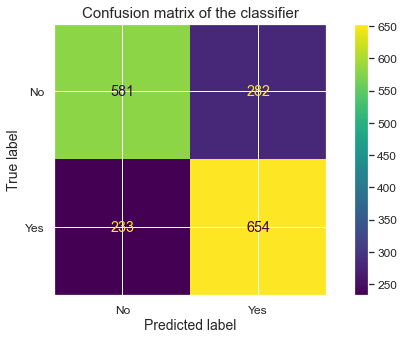

In [64]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=tuned_logreg, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)

plt.show()

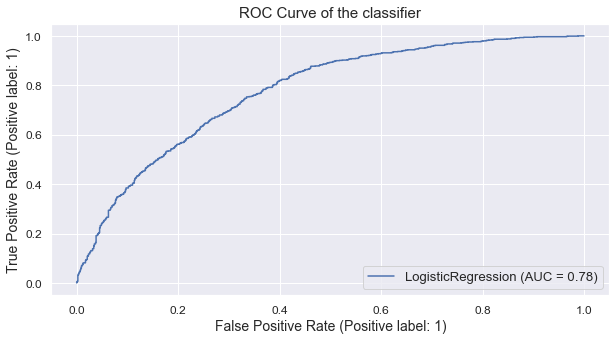

In [65]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=tuned_logreg, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

### Estimate the generalization error of a machine learning model using Cross-Validation Schemes

In [66]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [67]:
# estimate generalization error
clf = cross_validate(estimator=tuned_logreg,
                    X=X_train,
                    y=y_train,
                    scoring='roc_auc',
                    return_train_score=True,
                    cv=kf)

In [68]:
# mean test set roc-auc
clf["test_score"].mean()

0.7512735476970045

In [69]:
# mean train set roc-auc
clf["train_score"].mean()

0.7520787774070803

In [71]:
lrtable = pd.DataFrame()
lrtable = lrtable.append({'Model': "Logistic Regression",
                        'F1':  f1_score(y_test, tuned_logreg_pred),
                        'Recall': recall_score(y_test, tuned_logreg_pred),
                        'Precision': precision_score(y_test, tuned_logreg_pred),
                        'Accuracy': accuracy_score(y_test, tuned_logreg_pred),
                        'ROC-AUC': roc_auc_score(y_test, tuned_logreg_pred)
                      },
                        ignore_index=True)
                     
lrtable

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Logistic Regression,0.72,0.74,0.70,0.71,0.71


**==================================================================================================================**

## ***k***-nearest neighbor (***k***-NN)

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

## RandomSearchCV

In [72]:
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform", algorithm="auto", n_jobs=2)

In [73]:
parameters = { 'n_neighbors' : [1,2,3,4,5,6,7,8,9,10],
               'weights' : ['uniform', 'distance'],
               'algorithm':  ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

In [74]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [75]:
knn_randm = RandomizedSearchCV(estimator=knn, param_distributions = parameters, cv = 5, n_iter = 55, 
                           n_jobs=-1, scoring=scoring, refit='roc_auc')

In [76]:
%%time
knn_randm.fit(X_random, y_random)

CPU times: total: 359 ms
Wall time: 7.47 s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=2), n_iter=55,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                        'weights': ['uniform', 'distance']},
                   refit='roc_auc',
                   scoring={'accuracy', 'recall', 'precision', 'f1', 'roc_auc'})

In [77]:
knn_randm.best_estimator_

KNeighborsClassifier(n_jobs=2, n_neighbors=9, weights='distance')

In [78]:
knn_randm.best_score_

0.6156227985241124

In [79]:
knn_randm.best_params_

{'weights': 'distance', 'n_neighbors': 9, 'algorithm': 'auto'}

In [80]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 'roc_auc' : 'mean_test_roc_auc'
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        'ROC-AUC' : roc_auc
                        },
                        ignore_index=True
                       )
  
    return table

In [81]:
# Call the function on our model
knn_result_table = make_results("KNN Classifier RS", knn_randm, "roc_auc")
knn_result_table

,Model,Precision,Recall,F1,Accuracy,ROC-AUC
0,KNN Classifier RS,0.57,0.60,0.58,0.57,0.62


### KNN Model

In [82]:
knn = KNeighborsClassifier(n_neighbors=9, weights="distance", algorithm="auto")

In [83]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [84]:
knnpred = knn.predict(X_test)

In [85]:
knnpred[0:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [86]:
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.66      0.59      0.62       863
           1       0.64      0.70      0.67       887

    accuracy                           0.65      1750
   macro avg       0.65      0.64      0.64      1750
weighted avg       0.65      0.65      0.64      1750



In [87]:
knncm = confusion_matrix(y_test, knnpred, labels=knn.classes_)
knncm

array([[509, 354],
       [266, 621]], dtype=int64)

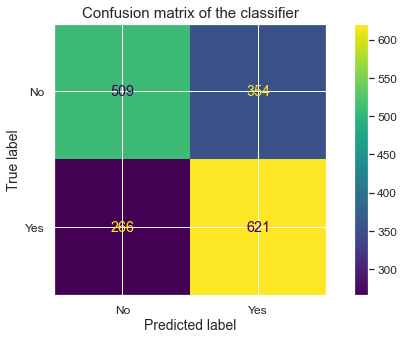

In [88]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=knn, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)
plt.show()

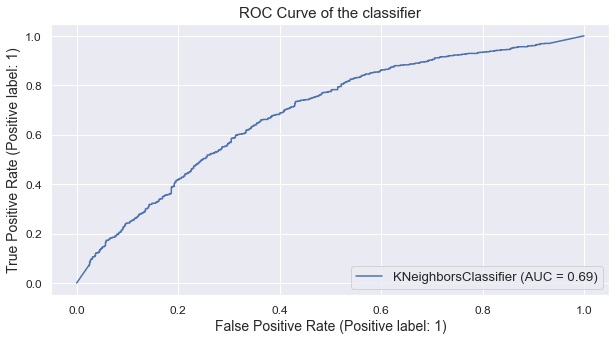

In [89]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=knn, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

### Estimate the generalization error of a machine learning model using Cross-Validation Schemes

In [90]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [91]:
# estimate generalization error
clf = cross_validate(estimator=knn,
                    X=X_train,
                    y=y_train,
                    scoring='roc_auc',
                    return_train_score=True,
                    cv=kf)

In [92]:
# mean train set roc-auc
clf["train_score"].mean()

0.9999225048164947

In [93]:
# mean test set roc-auc
clf["test_score"].mean()

0.6831972020547209

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.

In [94]:
### BEGIN SOLUTION
max_k = 10
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

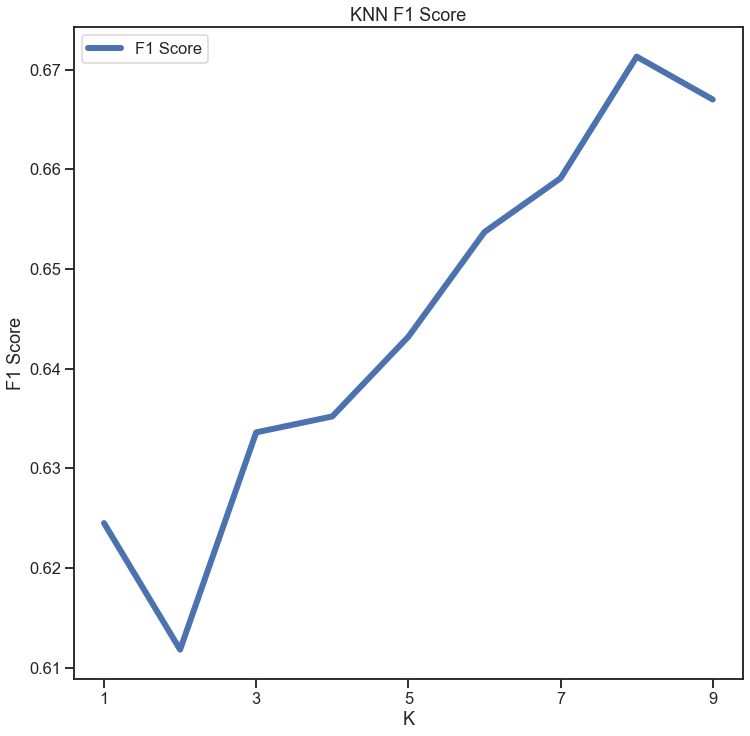

In [95]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
#plt.savefig('knn_f1.png')
plt.show()

<Figure size 1800x1200 with 0 Axes>

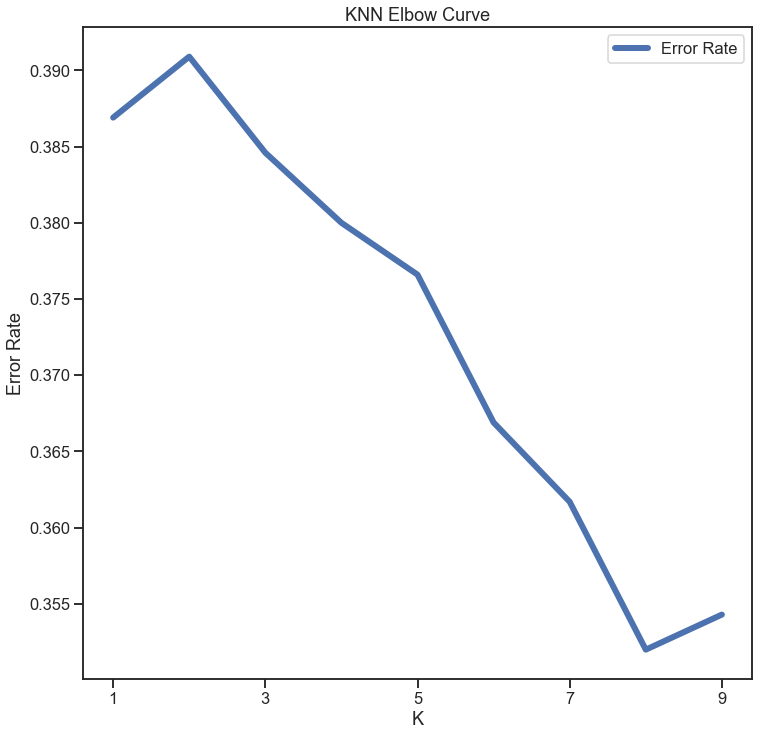

In [96]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
#plt.savefig('knn_elbow.png')
plt.show()

In [97]:
knntable = pd.DataFrame()
knntable = knntable.append({'Model': "KNN Classifcation",
                        'F1':  f1_score(y_test, knnpred),
                        'Recall': recall_score(y_test, knnpred),
                        'Precision': precision_score(y_test, knnpred),
                        'Accuracy': accuracy_score(y_test, knnpred),
                        'ROC-AUC': roc_auc_score(y_test, knnpred)
                      },
                        ignore_index=True)
                     
knntable

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,KNN Classifcation,0.67,0.70,0.64,0.65,0.64


**=================================================================================================================**

## Naive Bayes

In [98]:
# Fit the model
gnb = GaussianNB()

In [99]:
gnb.fit(X_train, y_train)

GaussianNB()

In [100]:
# Get the predictions on test data
gnb_preds = gnb.predict(X_test)

In [101]:
gnb_preds[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

### Naive Bayes Model Evaluation

In [102]:
print(classification_report(y_test,gnb_preds))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       863
           1       0.70      0.75      0.73       887

    accuracy                           0.71      1750
   macro avg       0.71      0.71      0.71      1750
weighted avg       0.71      0.71      0.71      1750



In [103]:
cm = confusion_matrix(y_test,gnb_preds)
cm

array([[582, 281],
       [222, 665]], dtype=int64)

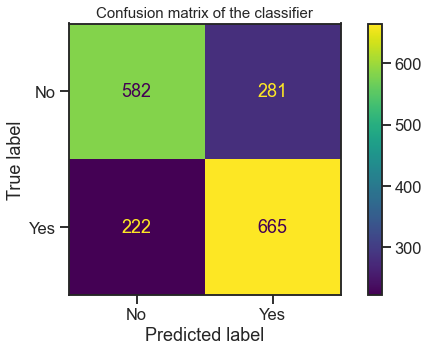

In [104]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=gnb, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)
plt.show()

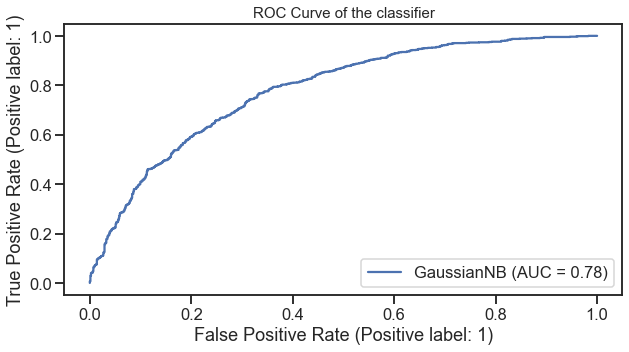

In [105]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=gnb, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

In [106]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, gnb_preds))
print('Precision:', '%.3f' % precision_score(y_test, gnb_preds))
print('Recall:', '%.3f' % recall_score(y_test, gnb_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, gnb_preds))

Accuracy: 0.713
Precision: 0.703
Recall: 0.750
F1 Score: 0.726


In [107]:
nbtable = pd.DataFrame()
nbtable = nbtable.append({'Model': "Naive Bayes Classifcation",
                        'F1':  f1_score(y_test, gnb_preds),
                        'Recall': recall_score(y_test, gnb_preds),
                        'Precision': precision_score(y_test, gnb_preds),
                        'Accuracy': accuracy_score(y_test, gnb_preds),
                        'ROC-AUC': roc_auc_score(y_test, gnb_preds)
                      },
                        ignore_index=True)
                     
nbtable

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Naive Bayes Classifcation,0.73,0.75,0.70,0.71,0.71


**=================================================================================================================**

# Model Comparison

Create a table of results to compare model performance.

In [109]:
# Create a table of results to compare model performance.

### YOUR CODE HERE ###

table = pd.DataFrame()
table = table.append(lrtable,
                        ignore_index=True
                    )

table = table.append(knntable,
                        ignore_index=True
                    )

table = table.append(nbtable,
                        ignore_index=True
                    )

table

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Logistic Regression,0.72,0.74,0.70,0.71,0.71
1,KNN Classifcation,0.67,0.70,0.64,0.65,0.64
2,Naive Bayes Classifcation,0.73,0.75,0.70,0.71,0.71


**=================================================================================================================**

## Support-vector machine (SVM)

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
    
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results.

## Train SVM with different regularization parameters and kernels

The `SVC` model provided by sklearn has two important arguments to be tuned: regularization parameter `C` and `kernel`.

The `C` argument is a regularization parameter.

*   For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.
*   Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

The `kernel` argument specifies the kernel to be used for transforming features to higher-dimensional spaces, some commonly used non-linear kernels are:

*   `rbf`: Gaussian Radial Basis Function (RBF)
*   `poly`: Polynomial Kernel
*   `sigmoid`: Sigmoid Kernel

In [ ]:
svmlin = LinearSVC(penalty='l2', C=1.0, random_state=0)

In [ ]:
svm = SVC(kernel='rbf', C=1.0, random_state=0)

In [ ]:
parameters = { 'C' : [1,2,3,4,5],
               'loss' : ['hinge', 'squared_hinge'],
               'penalty':  ['l1', 'l2']
             }

In [ ]:
parameters = { 'C' : [1,2,3,4,5],
               'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
               'gamma':  ['scale', 'auto']
             }

In [ ]:
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [ ]:
svm_randm = RandomizedSearchCV(estimator=svmlin, param_distributions = parameters, cv = 5, n_iter = 40, 
                           n_jobs=-1, scoring=scoring, refit='f1')

In [ ]:
svm_randm = RandomizedSearchCV(estimator=svm, param_distributions = parameters, cv = 5, n_iter = 40, 
                           n_jobs=-1, scoring=scoring, refit='f1')

In [ ]:
%%time
svm_randm.fit(X_random_train, y_random_train)

In [ ]:
svm_randm.best_estimator_

In [ ]:
svm_randm.best_score_

In [ ]:
svm_randm.best_params_

In [ ]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy
                        },
                        ignore_index=True
                       )
  
    return table

In [ ]:
# Call the function on our model
svm_result_table = make_results("SVM Classifier", svm_randm)
svm_result_table

### SVC Model

In [ ]:
svm = SVC(kernel='sigmoid', C=5.0, random_state=0)

In [ ]:
svm.fit(X_train,y_train)

In [ ]:
svmpred = svm.predict(X_test)

In [ ]:
svmpred[0:5]

In [ ]:
print(classification_report(y_test,svmpred))

In [ ]:
svmcm = confusion_matrix(y_test, svmpred, labels=svm.classes_)
svmcm

In [ ]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(svmcm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.xlabel('Predicted label')
ax.set_xticklabels(labels=['No','Yes'])
plt.ylabel('True label')
ax.set_yticklabels(labels=['No','Yes'])
plt.show()

In [ ]:
plot_roc_curve(svm,X_test,y_test)
plt.show()

In [ ]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, svmpred))
print('Precision:', '%.3f' % precision_score(y_test, svmpred))
print('Recall:', '%.3f' % recall_score(y_test, svmpred))
print('F1 Score:', '%.3f' % f1_score(y_test, svmpred))

**=================================================================================================================**

**=================================================================================================================**

#### Python code done by Dennis Lam